IMPORT LIBRARIES AND DATA SET

In [1]:
import os
import shutil
import stat

In [2]:
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), stat.S_IRUSR | stat.S_IWUSR)

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile

dataset='face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print("Data is extracted")

Data is extracted


In [5]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 90C9-46F1

 Directory of C:\Users\vaibh\Learnings\Face Mask Detection

06/22/2024  11:29 AM    <DIR>          .
06/22/2024  11:27 AM    <DIR>          ..
06/22/2024  11:29 AM    <DIR>          .ipynb_checkpoints
06/22/2024  11:28 AM    <DIR>          data
06/22/2024  11:27 AM                72 Face Mask Detection.ipynb
07/31/2020  06:35 PM       171,127,690 face-mask-dataset.zip
06/22/2024  11:27 AM                70 kaggle.json
               3 File(s)    171,127,832 bytes
               4 Dir(s)  368,424,296,448 bytes free


In [6]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir("data/with_mask")

In [8]:
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [10]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


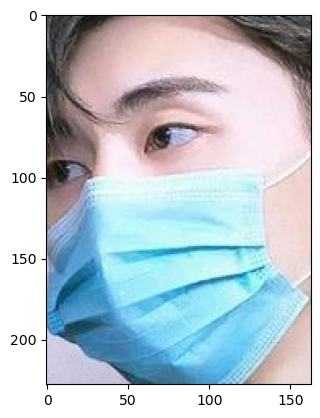

In [16]:
img = mpimg.imread('data/with_mask/with_mask_1545.jpg')
plt.imshow(img)

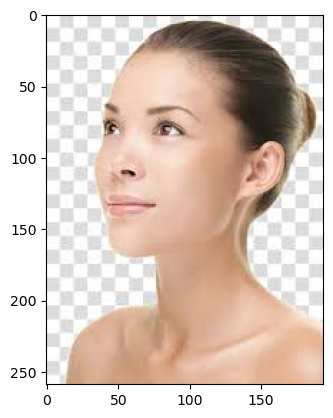

In [17]:
img = mpimg.imread('data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [19]:
with_mask_path='data/with_mask/'

data=[]

for img_file in with_mask_files:
    image=Image.open(with_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

without_mask_path='data/without_mask/'

for img_file in without_mask_files:
    image=Image.open(without_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [20]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [22]:
data[0].shape

(128, 128, 3)

In [21]:
len(data)

7553

In [23]:
X = np.array(data)
Y = np.array(labels)

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [28]:
X_train_scaled[0]

array([[[0.88235294, 0.92156863, 0.77647059],
        [0.82352941, 0.84705882, 0.72941176],
        [0.74117647, 0.7372549 , 0.6627451 ],
        ...,
        [0.73333333, 0.71372549, 0.64705882],
        [0.70980392, 0.68235294, 0.59215686],
        [0.64705882, 0.71372549, 0.52156863]],

       [[0.87843137, 0.89411765, 0.85098039],
        [0.79215686, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75686275],
        ...,
        [0.77647059, 0.74509804, 0.70588235],
        [0.69411765, 0.6627451 , 0.60392157],
        [0.61960784, 0.71372549, 0.55294118]],

       [[0.80392157, 0.8       , 0.83921569],
        [0.86666667, 0.85882353, 0.89019608],
        [0.76470588, 0.74901961, 0.77254902],
        ...,
        [0.71764706, 0.67843137, 0.68235294],
        [0.68235294, 0.64705882, 0.62745098],
        [0.68235294, 0.79607843, 0.65098039]],

       ...,

       [[0.60784314, 0.69019608, 0.78039216],
        [0.62745098, 0.70588235, 0.77254902],
        [0.64705882, 0

MODEL TRAINING......

In [29]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [38]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [39]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 28s 146ms/step - acc: 0.6248 - loss: 0.8459 - val_acc: 0.8876 - val_loss: 0.2725
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - acc: 0.8754 - loss: 0.3064 - val_acc: 0.9124 - val_loss: 0.2271
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - acc: 0.9084 - loss: 0.2537 - val_acc: 0.9289 - val_loss: 0.2058
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 151ms/step - acc: 0.9171 - loss: 0.1968 - val_acc: 0.9355 - val_loss: 0.1904
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - acc: 0.9396 - loss: 0.1637 - val_acc: 0.9388 - val_loss: 0.2062
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 151ms/step - acc: 0.9420 - loss: 0.1366 - val_acc: 0.9372 - val_loss: 0.1870
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step - acc: 0.9561 - loss: 0.1185 - val_acc: 0.9306 - val_loss: 0.2007
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 27s 159ms/step - acc: 0.9630 - loss: 0.0908 - val_acc: 0.9289 - val_loss: 0.2172
Epoch 9/10
170/170 ━━━━━━━━━━━━━

In [40]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.9260 - loss: 0.2181


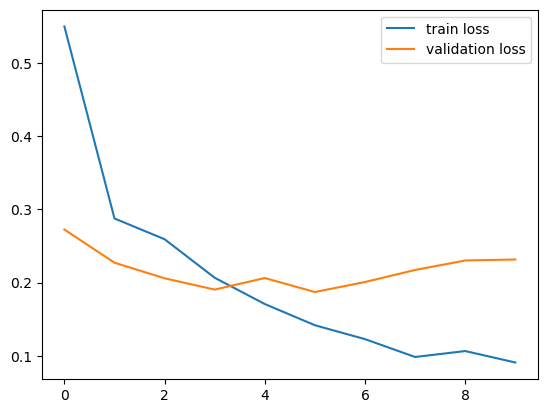

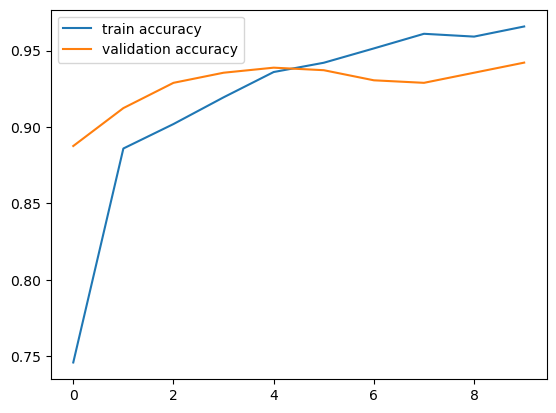

In [42]:
h=history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

PREDICTIVE SYSTEM:

Path of the image to be predicted:  MASK.jpg


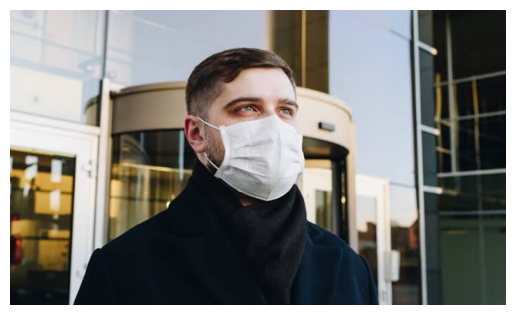

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.17386949 0.9724694 ]]
1
The person in the image is wearing a mask


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)
plt.axis("off")
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted:  NOMASK.jpg


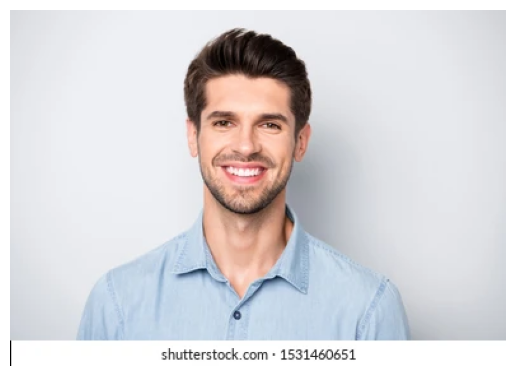

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.72930515 0.18100975]]
0
The person in the image is not wearing a mask


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)
plt.axis("off")
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')